In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("D:\TaiLieu\KhaiPhaDuLieu\BaiTapLon\TapDuLieu\diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.drop(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 	'diabetes'], axis = 1, inplace = True)

In [4]:
df.isna().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [3]:
df.drop_duplicates(inplace=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()
df["gender"] = le.fit_transform(df['gender'])
df["smoking_history"] = le.fit_transform(df['smoking_history'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [6]:
X = df.iloc[:, 0:8]
Y = df.iloc[:, 8]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [10]:
svm = SVC(kernel= 'rbf')
svm.fit(X_train, Y_train)

SVC()

In [11]:
w = svm.coef_
b = svm.intercept_
print('w = ', w)
print('b = ', b)

AttributeError: coef_ is only available when using a linear kernel

In [18]:
support_vectors = svm.support_vectors_
dual_coef = svm.dual_coef_
intercept = svm.intercept_

print("Support vectors:", support_vectors)
print("Dual coefficients:", dual_coef)
print("Intercept:", intercept)

Support vectors: [[0.         0.72472472 0.         ... 0.32352941 0.56363636 0.09090909]
 [0.         0.5995996  0.         ... 0.3785014  0.56363636 0.27272727]
 [0.5        0.78728729 0.         ... 0.2710084  0.45454545 0.54545455]
 ...
 [0.         0.81231231 1.         ... 0.20273109 0.6        0.27272727]
 [0.         0.54954955 0.         ... 0.16993464 0.56363636 0.22727273]
 [0.         0.83733734 0.         ... 0.20203081 0.56363636 0.63636364]]
Dual coefficients: [[-1. -1. -1. ...  1.  1.  1.]]
Intercept: [0.51989909]


In [11]:
y_pred = svm.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     26267
           1       0.97      0.59      0.73      2577

    accuracy                           0.96     28844
   macro avg       0.96      0.79      0.86     28844
weighted avg       0.96      0.96      0.96     28844



In [12]:
from sklearn.metrics import confusion_matrix , precision_score, accuracy_score , recall_score
print("Accuracy: " , accuracy_score(Y_test, y_pred))
print("Precision: " , precision_score(Y_test ,y_pred))
print("Recall: " , recall_score(Y_test , y_pred) )
matrix = confusion_matrix(Y_test , y_pred)
print("Confusion matrix: ")
print(matrix)

Accuracy:  0.9615864651227292
Precision:  0.9651678277390754
Recall:  0.5913853317811408
Confusion matrix: 
[[26212    55]
 [ 1053  1524]]


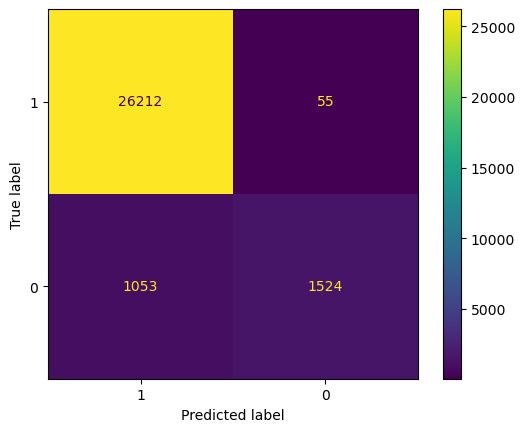

In [13]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["1", "0"])

cm_display.plot()
plt.show()

In [14]:
svm1 = SVC(C=5, degree=2, kernel='poly')
svm1.fit(X_train, Y_train)

SVC(C=5, degree=2, kernel='poly')

In [15]:
y_pred_1 = svm1.predict(X_test)
print(classification_report(Y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     26267
           1       0.95      0.61      0.74      2577

    accuracy                           0.96     28844
   macro avg       0.96      0.80      0.86     28844
weighted avg       0.96      0.96      0.96     28844



In [16]:
from sklearn.metrics import confusion_matrix , precision_score, accuracy_score , recall_score
print("Accuracy: " , accuracy_score(Y_test, y_pred_1))
print("Precision: " , precision_score(Y_test ,y_pred_1))
print("Recall: " , recall_score(Y_test , y_pred_1) )
matrix_1 = confusion_matrix(Y_test , y_pred_1)
print("Confusion matrix: ")
print(matrix_1)

Accuracy:  0.9622105117182083
Precision:  0.9492447129909366
Recall:  0.6096235933255724
Confusion matrix: 
[[26183    84]
 [ 1006  1571]]


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
w = rfc.coef_
b = rfc.intercept_
print('w = ', w)
print('b = ', b)

In [33]:
y_pred_2 = rfc.predict(X_test)
print(classification_report(Y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26267
           1       0.94      0.70      0.80      2577

    accuracy                           0.97     28844
   macro avg       0.96      0.85      0.89     28844
weighted avg       0.97      0.97      0.97     28844



In [38]:
print("Accuracy: " , accuracy_score(Y_test, y_pred_2))
print("Precision: " , precision_score(Y_test ,y_pred_2))
print("Recall: " , recall_score(Y_test , y_pred_2) )
matrix_1 = confusion_matrix(Y_test , y_pred_2)
print("Confusion matrix: ")
print(matrix_1)

Accuracy:  0.9693870475662183
Precision:  0.9393153526970954
Recall:  0.702755141637563
Confusion matrix: 
[[26150   117]
 [  766  1811]]


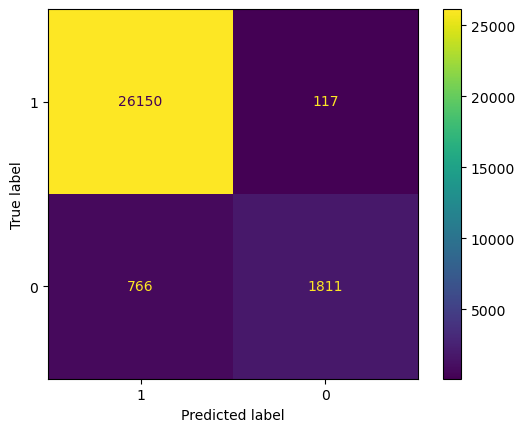

In [39]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred_2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix_1, display_labels = ["1", "0"])

cm_display.plot()
plt.show()